# Project 6 Custom Data Anlaytics Project
Brittany Dowdle   06/05/2024

## Overview
In this project, I'll use Jupyter to perform a custom project. I will perform my own unique exploratory data analysis project and present data stories by narrating my process and sharing the insights gained from the data.

## Objective
Perform and publish a custom EDA project to demnostrate skills with Jupyter, pandas, Seaborn and popular tools for data analytics. The notebook should tell a data story and visually present findings in a clear and engaging manner.

## Choose a dataset for analysis
Palmerpenguins is a great dataset for data exploration and visualization. Data comes from 3 penguin species in the islands of Palmer Archipelago, Antarctica.

### Import Dependencies *(At the Top, After the Introduction)*
Follow conventional package import organization and alias.
Import each package just once near the top of the file.
Be sure you have **INSTALLED** any external packages *(outside the Python Standard Library)* into your active project virtual environment first.

In [2]:
#Execute the cell seperately to ensure everything works.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualisation libraries
import seaborn as sns
import plotly.express as px


### Data Acquisition
Load the data into a suitable structure for analysis, typically a DataFrame when working with Python.
Use the palmerpenguins dataset available in the data.csv file.

In [4]:
df = pd.read_csv('data.csv')
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


### Initial Data Inspection
Display the first 10 rows of the DataFrame, check the shape, and display the data types of each column.
This step is crucial for getting familiar with the dataset's format, size, and the type of information each column holds.

In [ ]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

In case you aren't familiar with penguins, here is a diagram of where the measurements for the bill come from.
![Penguin Bills](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)
Artwork by @allison_horst

Flippers are penguins wings. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip.

### Initial Descriptive Statistics
Use the DataFrame describe() method to display summary statistics for each numerical column.
This provides insights into the distribution and central tendencies of the data, which can be crucial for identifying patterns, anomalies, or data integrity issues.

In [ ]:
print(df.describe())

### Initial Data Distribution for Numerical Columns
Choose a numerical column and use df['column_name'].hist() to plot a histogram for that specific column.
To show all the histograms for all numerical columns, use df.hist().

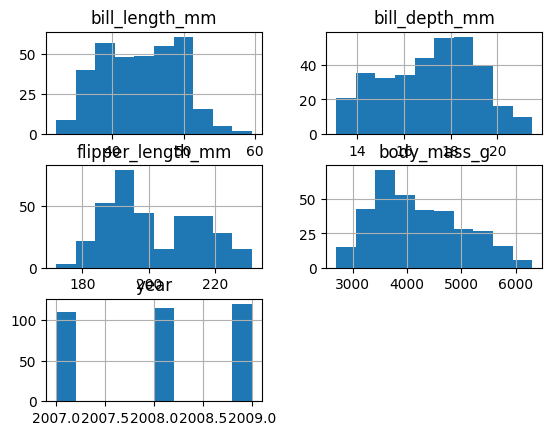

In [5]:
# Example of specific column histogram
# df['flipper_length_mm'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

>#### Numerical Distribution Observations
>
>Bill Length (mm): Bimodal distribution with peaks around 40-45 mm and 50-55 mm.
>
>Bill Depth (mm): Slightly right-skewed, most data points between 15-19 mm, peaking around 17 mm.
>
>Flipper Length (mm): Bimodal distribution with peaks around 190 mm and 210 mm.
>
>Body Mass (g): Right-skewed, most data points between 3000-5000 g, peaking around 4000 g.
>
>Year: Evenly distributed across four years (2007, 2008, 2009, and 2010), indicating balanced data collection.

### Initial Data Distribution for Categorical Columns
Choose a categorical column and use df['column_name'].value_counts() to display the count of each category.
Use a loop to show the value counts for all categorical columns.

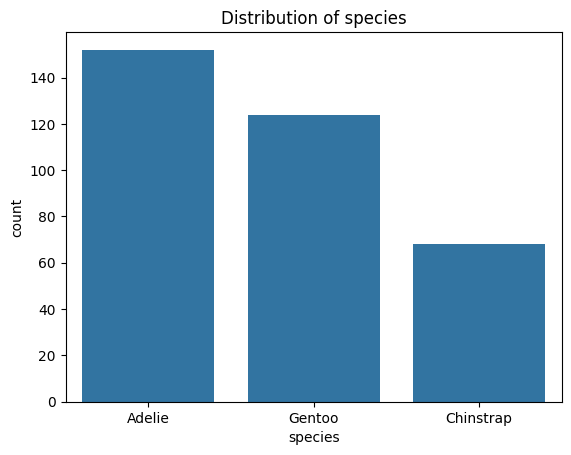

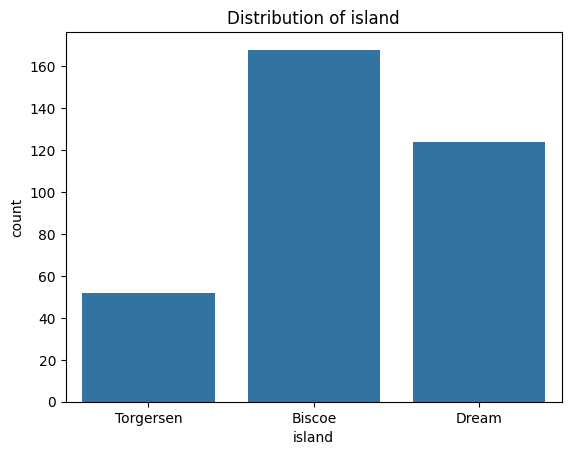

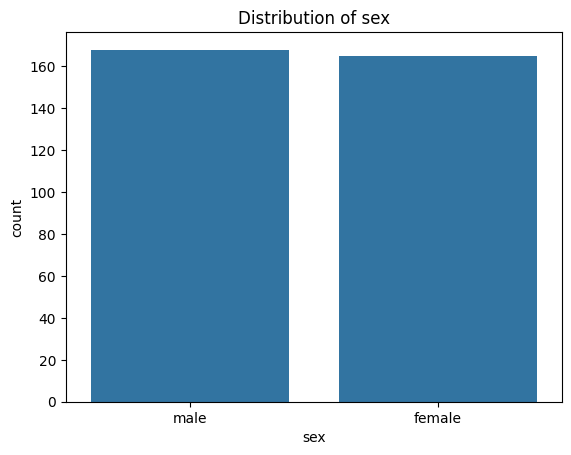

In [6]:
# example df['species'].value_counts()
# example plt.show()

# Loop
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

>#### Categorical Distribution Observations
>
>Species: Adelie is the most common species in this sample.
>
>Island: Biscoe Island has the highest penguin population.
>
>Sex: Male and female penguins are evenly distributed in this dataset. 🐧